   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


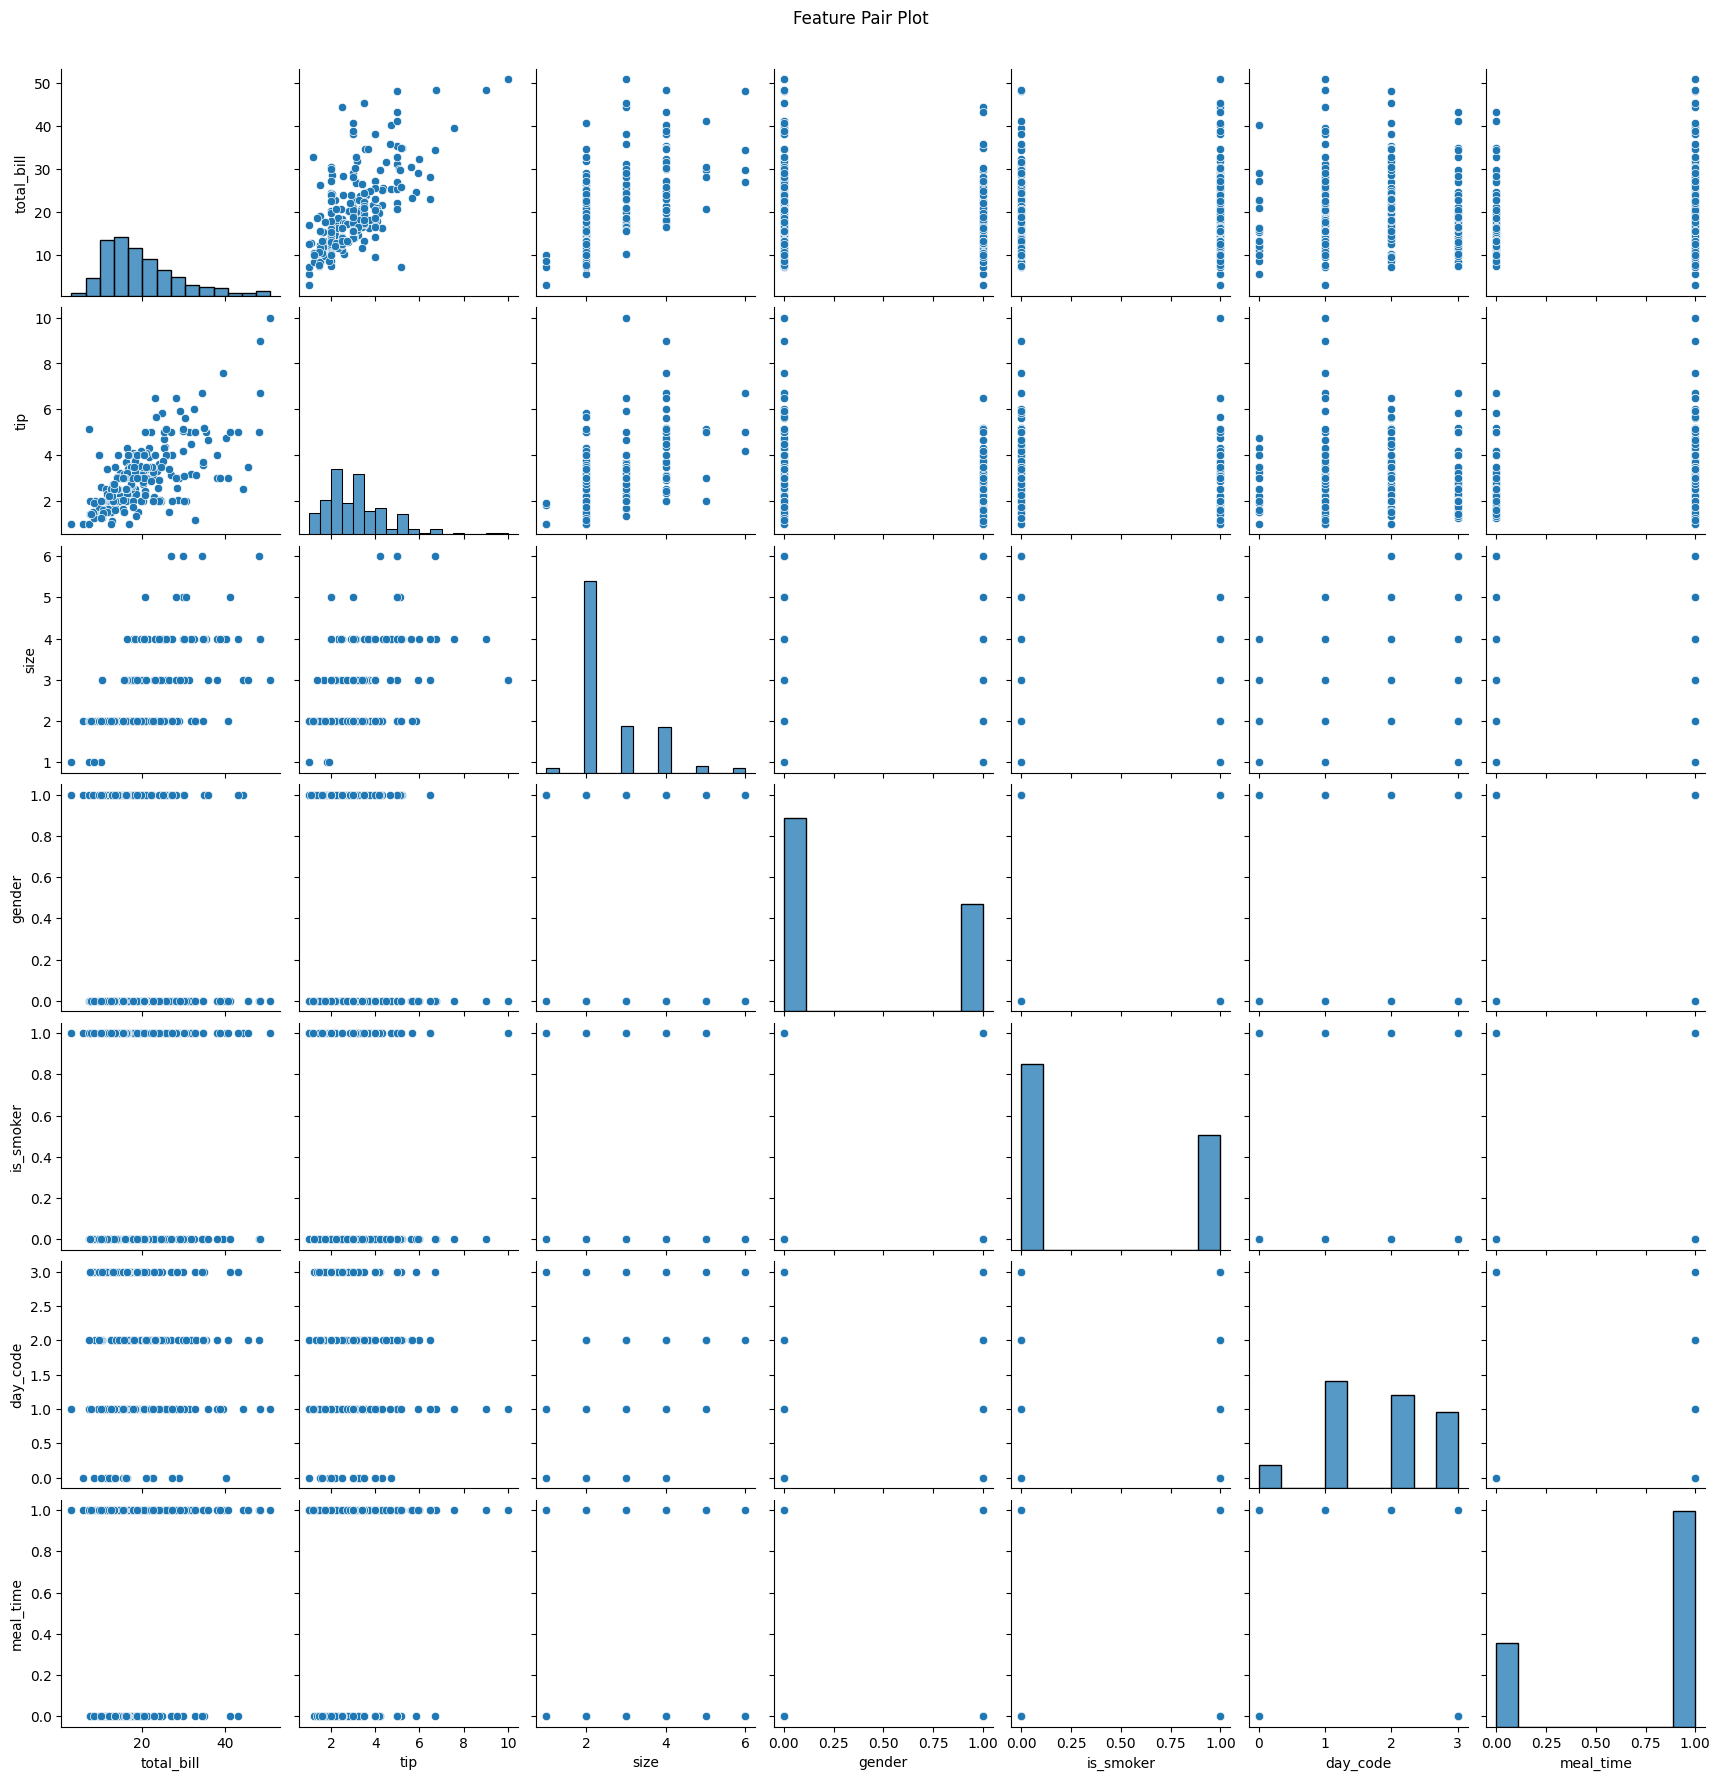

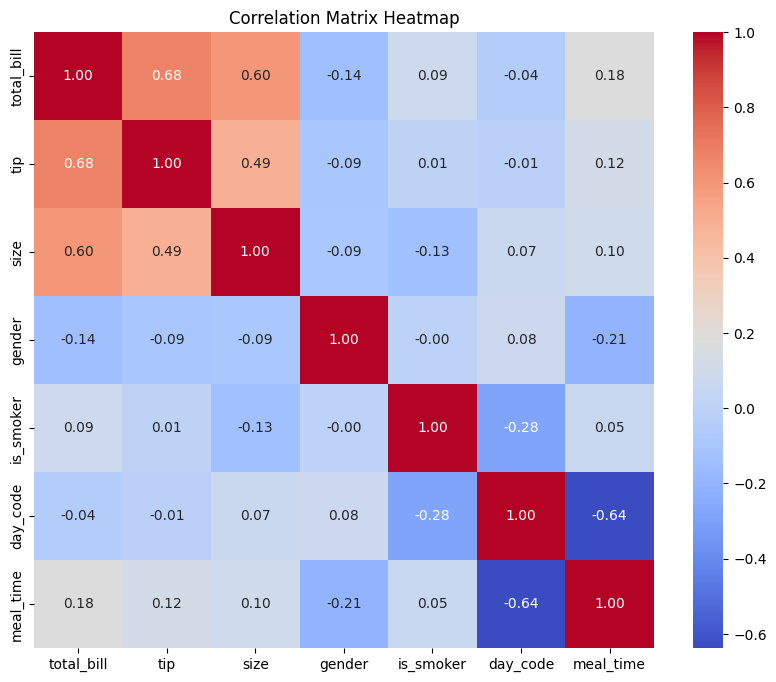

Rainbow Test Statistic: 1.2036, p-value: 0.1580


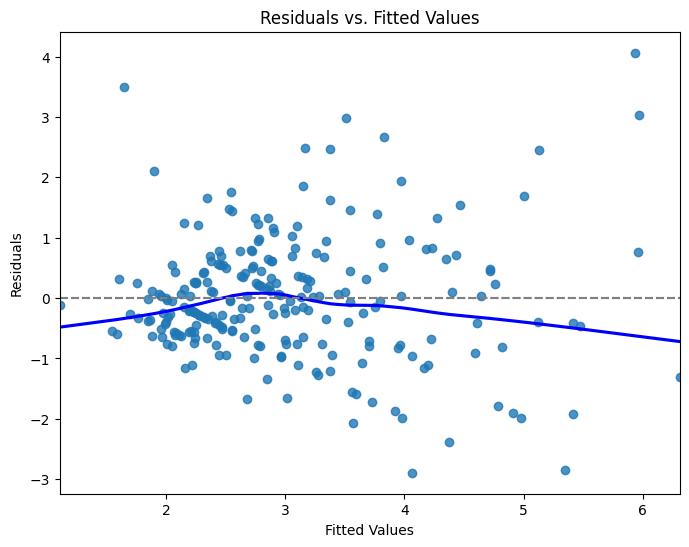

                     Model  R² Score       MAE       MSE
5                      SVR  0.569327  0.570691  0.538329
2                    Lasso  0.527307  0.637484  0.590853
1                    Ridge  0.445788  0.669679  0.692749
0        Linear Regression  0.444137  0.670381  0.694813
6            KNN Regressor  0.329403  0.726245  0.838227
4  Random Forest Regressor  0.250314  0.765361  0.937086
3  Decision Tree Regressor -0.034063  0.886735  1.292549

The model with the highest R² Score is: SVR


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from statsmodels.stats.diagnostic import linear_rainbow
import statsmodels.api as sm

# Load dataset
data = pd.read_csv("/content/tips (data for regression problem).csv")
print(data.head())

# Data Preprocessing
data['gender'] = data['sex'].apply(lambda x: 0 if x == 'Male' else 1)
data['is_smoker'] = data['smoker'].apply(lambda x: 1 if x == 'Yes' else 0)
data['day_code'] = data['day'].astype('category').cat.codes
data['meal_time'] = data['time'].map({'Lunch': 0, 'Dinner': 1})
data.drop(['sex', 'smoker', 'day', 'time'], axis=1, inplace=True)

# Pair plot and heatmap with modified color scheme
sns.pairplot(data)
plt.suptitle("Feature Pair Plot", y=1.02)
plt.show()

plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()

# Linearity Check: Rainbow Test
X = data[['total_bill', 'size', 'gender', 'is_smoker', 'day_code', 'meal_time']]
y = data['tip']
X_with_const = sm.add_constant(X)
linear_model = sm.OLS(y, X_with_const).fit()
rainbow_statistic, rainbow_p_value = linear_rainbow(linear_model)
print(f"Rainbow Test Statistic: {rainbow_statistic:.4f}, p-value: {rainbow_p_value:.4f}")

# Residual Plot with updated line color
plt.figure(figsize=(8, 6))
sns.residplot(x=linear_model.fittedvalues, y=linear_model.resid, lowess=True, line_kws={'color': 'blue'})
plt.title("Residuals vs. Fitted Values")
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.axhline(0, color='gray', linestyle='--')
plt.show()

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define and fit models
models_dict = {
    "Linear Regression": LinearRegression(),
    "Ridge": Ridge(alpha=1.0),
    "Lasso": Lasso(alpha=0.1),
    "Decision Tree Regressor": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(n_estimators=100, random_state=0),
    "SVR": SVR(kernel='rbf'),
    "KNN Regressor": KNeighborsRegressor(n_neighbors=5)
}

# Store model evaluation metrics
results = []
for model_name, model in models_dict.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    results.append({
        "Model": model_name,
        "R² Score": r2,
        "MAE": mae,
        "MSE": mse
    })

# Display results
results_df = pd.DataFrame(results).sort_values(by="R² Score", ascending=False)
print(results_df)

# Identify the best model based on R² Score
best_model = results_df.iloc[0]["Model"]
print(f"\nThe model with the highest R² Score is: {best_model}")